In [1]:
from keras.models import load_model
from keras.utils import plot_model
import os

root = '.'
dataset_dir = os.path.join(root, 'generated', 'ssd_samples_6')

Using TensorFlow backend.


In [11]:
"""
Load SSD model
"""
from ssd_tools.keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from ssd_tools.keras_loss_function.keras_ssd_loss import SSDLoss

ssd_loss  = SSDLoss(neg_pos_ratio=3, alpha=1.0)
loaded_model = load_model(os.path.join(dataset_dir, 'plate_ssd7_epoch-20_loss-0.7405_val_loss-0.3513.h5'), custom_objects={
    'AnchorBoxes': AnchorBoxes,
    'compute_loss': ssd_loss.compute_loss
})
plot_model(loaded_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'loaded_model.jpg'))

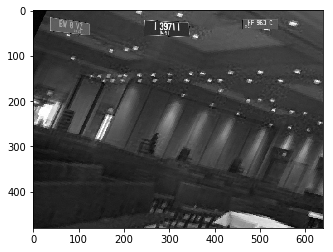

In [18]:
"""
Prepare inference
"""
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np

img_dir = os.path.join(dataset_dir, 'dataset1')

img_filename = os.listdir(img_dir)

img = cv2.imread(os.path.join(img_dir, img_filename[0]))
plt.imshow(img)
plt.show()

In [64]:
"""
Do Inference
"""
from ssd_tools.ssd_encoder_decoder.ssd_output_decoder import decode_detections

i = 12
img = cv2.imread(os.path.join(img_dir, img_filename[i]))
img = np.expand_dims(img, 0)
output = loaded_model.predict(img)
decoded_output = decode_detections(output, 
                                   confidence_thresh=0.8,
                                   iou_threshold=0.2,
                                   top_k=100,
                                   normalize_coords=True,
                                   img_height=480,
                                   img_width=640)
decoded_output

[array([[ 1.00000000e+00,  9.99999523e-01,  4.57839737e+02,
          2.47363157e+02,  5.42937698e+02,  2.90100489e+02],
        [ 1.00000000e+00,  9.99989390e-01,  2.69821644e+01,
          1.41825771e+02,  1.42098818e+02,  1.77622690e+02],
        [ 1.00000000e+00,  9.99802649e-01,  2.55231514e+02,
         -9.82224941e-03,  3.53072777e+02,  3.13258123e+01]])]

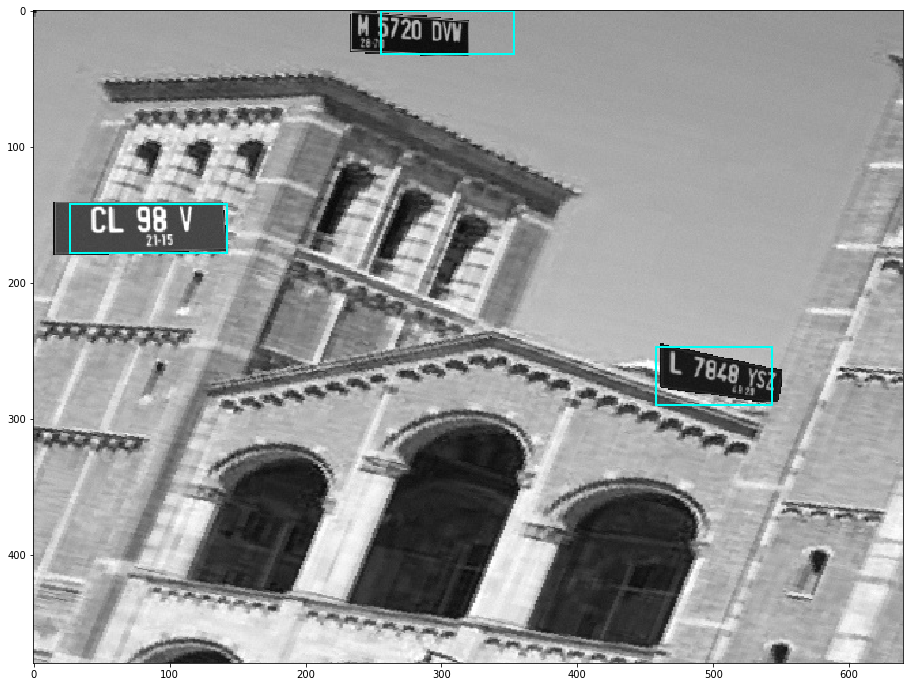

In [65]:
"""
Show the result
"""
plt.figure(figsize=(20, 12))
plt.imshow(img[0])

current_axis = plt.gca()
colors = plt.cm.hsv(np.linspace(0, 1, 3)).tolist()


for box in decoded_output[0]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    # label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  